# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
distrib_func = sts.rice(b=0.75)
sample = distrib_func.rvs(100)  # генерация 100 значений

real_mean = distrib_func.mean()  # настоящее среднее случайной величины
real_var = distrib_func.var()  # настоящая дисперсия случайной величины

sample_mean = sample.mean()  # выборочное среднее
sample_var = sample.var()  # выборочная дисперсия

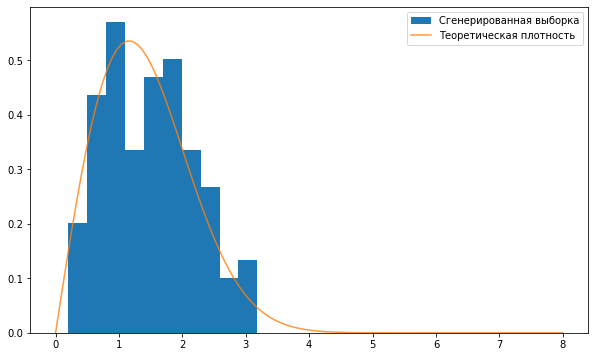

In [3]:
x = np.linspace(0, 8, 100)

plt.figure(figsize=(10, 6))
plt.hist(sample, density=True, label='Сгенерированная выборка')
plt.plot(x, distrib_func.pdf(x), label='Теоретическая плотность', alpha=0.8)
plt.legend();

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

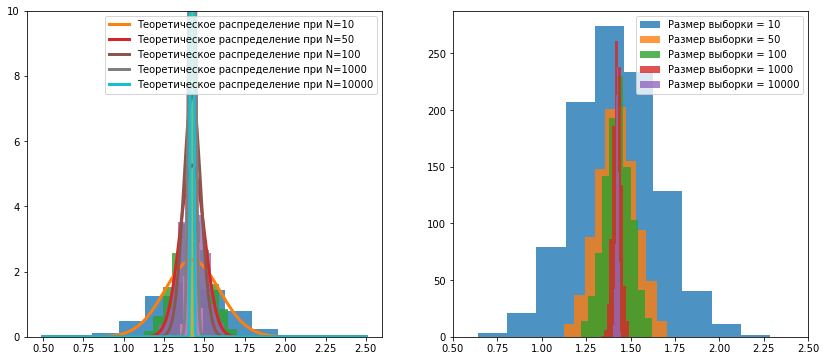

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for size_sample in [10, 50, 100, 1000, 10000]:
    # расчёт выборочных средних
    means = []
    for _ in range(1000):
        means.append(distrib_func.rvs(size_sample).mean())
    axs[0].hist(means, alpha=0.8, density=True)
    axs[1].hist(means, label=f'Размер выборки = {size_sample}', alpha=0.8)

    # расчёт теоретического распределения выборочных средних
    sample_theor_distr = sts.norm(loc=real_mean, scale=real_var / np.sqrt(size_sample))
    x = np.linspace(0.5, 2.5, 300)
    axs[0].plot(x, sample_theor_distr.pdf(x),
                label=f'Теоретическое распределение при N={size_sample}',
                linewidth=3)

axs[0].legend()
axs[1].legend()
axs[0].set_ylim(0, 10)
axs[1].set_xlim(0.5, 2.5);

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

На мой взгляд, апроксимация распределения выборочного среднего для данного распределения **работает**. Теоретический и практический способ даёт очень похожий результат. Это напрямую связано с самим исходным распределением - оно похоже на колокообразное с небольшим вытянутым участком справа. Чем больше размер выборки, тем выборочное более узкий доверительный интервал (распределение) и выборочное среднее ближе к релаьному.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.

In [5]:
from statsmodels.stats.weightstats import _zconfint_generic

url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


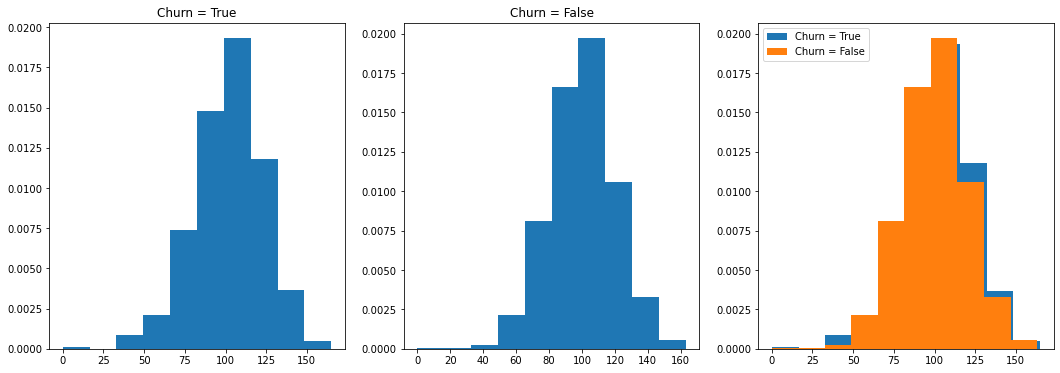

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].hist(df[df.churn == True]['total day calls'], density=True)
axs[0].set_title('Churn = True')
axs[1].hist(df[df.churn == False]['total day calls'], density=True)
axs[1].set_title('Churn = False')

axs[2].hist(df[df.churn == True]['total day calls'], density=True, label='Churn = True')
axs[2].hist(df[df.churn == False]['total day calls'], density=True, label='Churn = False')
axs[2].legend();

Выберем уровень значимости в 95%:

In [14]:
mean_churn_true = df[df.churn == True]['total day calls'].mean()
mean_churn_false = df[df.churn == False]['total day calls'].mean()

std_churn_true = df[df.churn == True]['total day calls'].std(ddof=1)
std_churn_false = df[df.churn == False]['total day calls'].std(ddof=1)

n_churn_true = len(df[df.churn == True]['total day calls'])
n_churn_false = len(df[df.churn == False]['total day calls'])

print(
    f"Доверительный интервал для среднего по ЦПТ для случая churn = True, если нам известна дисперсия:\n"
    f"[{(mean_churn_true - 1.96 * std_churn_true / np.sqrt(n_churn_true - 1)):.2f}, {round(mean_churn_true + 1.96 * std_churn_true / np.sqrt(n_churn_true - 1), 2)}]"
)
print("Доверительный интервал для среднего по ЦПТ  для случая churn = True методом _zconfint_generic: {} ".format(
    _zconfint_generic(mean_churn_true,  std_churn_true, alpha=0.95, alternative='two-sided')
))
print()

print(
    f"Доверительный интервал для среднего по ЦПТ для случая churn = False, если нам известна дисперсия:\n"
    f"[{(mean_churn_false - 1.96 * std_churn_false / np.sqrt(n_churn_false - 1)):.2f}, {round(mean_churn_false + 1.96 * std_churn_false / np.sqrt(n_churn_false - 1), 2)}]"
)
print("Доверительный интервал для среднего по ЦПТ  для случая churn = False методом _zconfint_generic: {} ".format(
    _zconfint_generic(mean_churn_false,  std_churn_false, alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по ЦПТ для случая churn = True, если нам известна дисперсия:
[99.41, 103.26]
Доверительный интервал для среднего по ЦПТ  для случая churn = True методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 

Доверительный интервал для среднего по ЦПТ для случая churn = False, если нам известна дисперсия:
[99.56, 101.01]
Доверительный интервал для среднего по ЦПТ  для случая churn = False методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


Доверительные интервалы довольно близко совпадают для двух методов.